# Ordinary Least Squares (OLS) vs Total Least Squares (TLS) 

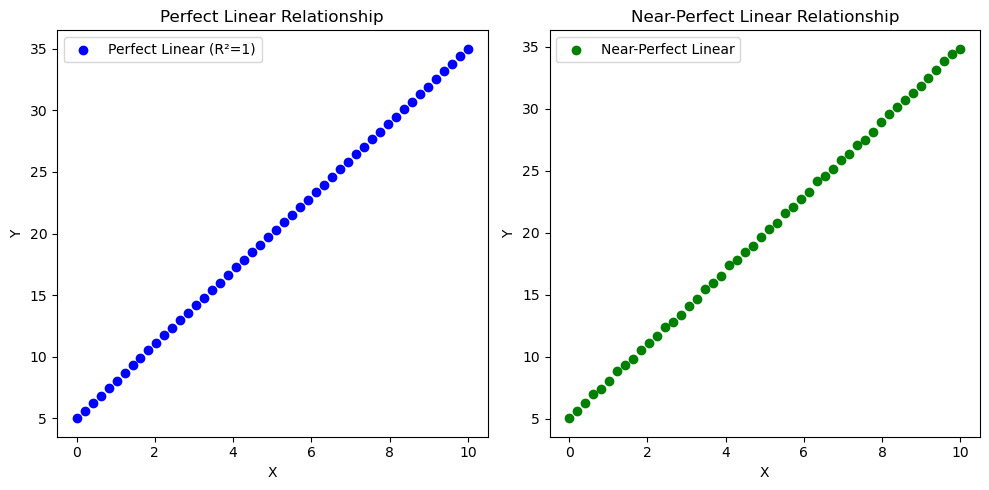

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate X values
X = np.linspace(0, 10, 50)

# Perfect linear relationship
Y_perfect = 3 * X + 5

# Near-perfect linear relationship with small noise
np.random.seed(42)  # For reproducibility
noise = np.random.normal(0, 0.1, size=len(X))
Y_near_perfect = 3 * X + 5 + noise

# Plot the data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X, Y_perfect, color='blue', label='Perfect Linear (R²=1)')
plt.title("Perfect Linear Relationship")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X, Y_near_perfect, color='green', label='Near-Perfect Linear')
plt.title("Near-Perfect Linear Relationship")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
from scipy.linalg import svd

# Fit OLS
ols_model = LinearRegression()
ols_model.fit(X.reshape(-1, 1), Y_near_perfect)
ols_slope = ols_model.coef_[0]
ols_intercept = ols_model.intercept_

# Fit TLS using SVD
X_mean, Y_mean = np.mean(X), np.mean(Y_near_perfect)
X_centered, Y_centered = X - X_mean, Y_near_perfect - Y_mean
U, S, Vt = svd(np.column_stack((X_centered, Y_centered)))
tls_slope = -Vt[0, 1] / Vt[0, 0]
tls_intercept = Y_mean - tls_slope * X_mean

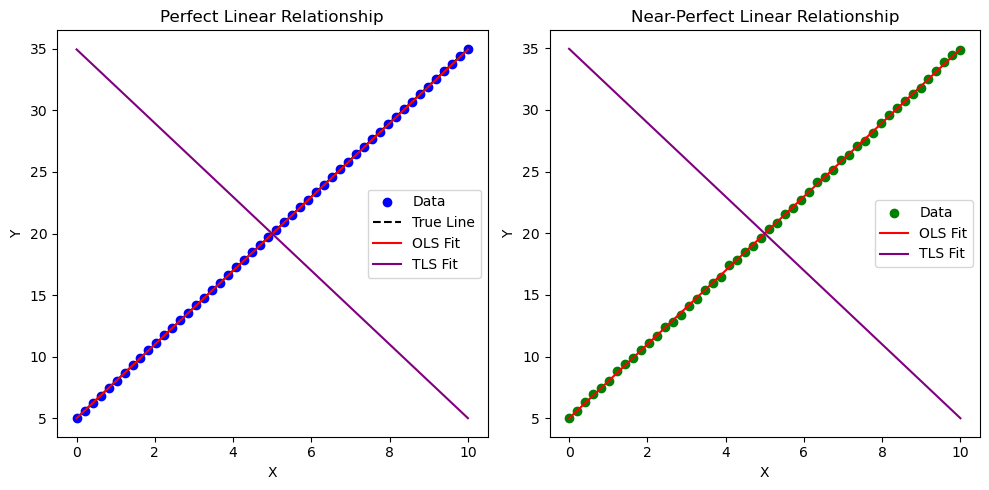

In [10]:
# Plot with fitted lines
plt.figure(figsize=(10, 5))

# Perfect linear relationship
plt.subplot(1, 2, 1)
plt.scatter(X, Y_perfect, color='blue', label='Data')
plt.plot(X, 3 * X + 5, color='black', linestyle='--', label='True Line')
plt.plot(X, ols_slope * X + ols_intercept, color='red', label='OLS Fit')
plt.plot(X, tls_slope * X + tls_intercept, color='purple', label='TLS Fit')
plt.title("Perfect Linear Relationship")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

# Near-perfect linear relationship
plt.subplot(1, 2, 2)
plt.scatter(X, Y_near_perfect, color='green', label='Data')
plt.plot(X, ols_slope * X + ols_intercept, color='red', label='OLS Fit')
plt.plot(X, tls_slope * X + tls_intercept, color='purple', label='TLS Fit')
plt.title("Near-Perfect Linear Relationship")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

plt.tight_layout()
plt.show()

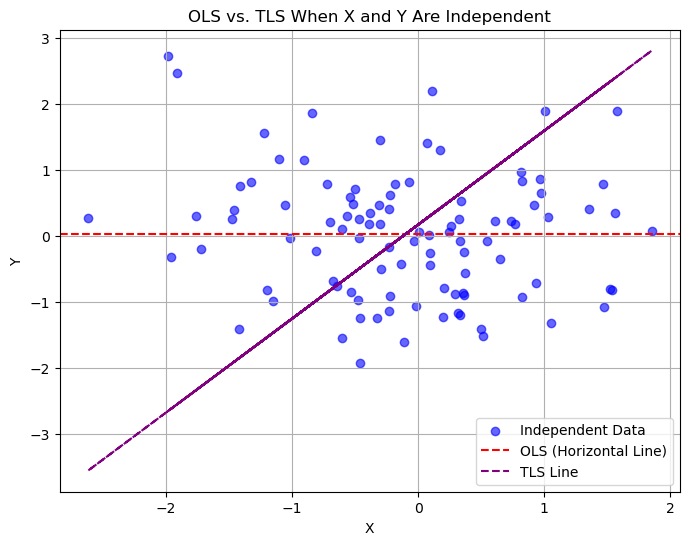

OLS Slope: -0.1447, Intercept: 0.0073
TLS Slope: 1.4208, Intercept: 0.1699


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd

# Generate independent data
np.random.seed(42)
X = np.random.normal(0, 1, 100)  # X ~ N(0, 1)
Y = np.random.normal(0, 1, 100)  # Y ~ N(0, 1), independent of X

# OLS Regression
ols_slope = np.cov(X, Y)[0, 1] / np.var(X)  # Slope
ols_intercept = np.mean(Y) - ols_slope * np.mean(X)  # Intercept

# TLS Regression
X_centered = X - np.mean(X)
Y_centered = Y - np.mean(Y)
data_matrix = np.column_stack((X_centered, Y_centered))
U, S, Vt = svd(data_matrix)
V = Vt.T
tls_slope = -V[0, 1] / V[0, 0]
tls_intercept = np.mean(Y) - tls_slope * np.mean(X)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, label="Independent Data", color="blue", alpha=0.6)
plt.axhline(np.mean(Y), color="red", linestyle="--", label="OLS (Horizontal Line)")
plt.plot(X, tls_slope * X + tls_intercept, color="purple", linestyle="--", label="TLS Line")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("OLS vs. TLS When X and Y Are Independent")
plt.legend()
plt.grid()
plt.show()

print(f"OLS Slope: {ols_slope:.4f}, Intercept: {ols_intercept:.4f}")
print(f"TLS Slope: {tls_slope:.4f}, Intercept: {tls_intercept:.4f}")